In [2]:
import keras
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout
from keras.layers import Input, BatchNormalization, Activation
from keras import regularizers
from keras import initializers

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score


from IPython import embed

In [3]:
def import_data(dataset="data"):
    X = []
    Y = []

    f=open(dataset, 'r')
    for line in f.readlines():
        intLine = [int(s) for s in line.split(' ')]
        X.append(intLine[:-1])
        Y.append(intLine[-1:])

    return np.array(X),np.array(Y)

In [4]:
def create_dense_model(input_size):
    model = Sequential()
    layer_size = 0

    if input_size % 2 == 0:
        layer_size = int(input_size/2 + 1)
    else:
        layer_size = int((input_size+1)/2)
# #     layer_size = input_size*2

    model.add(Dense(input_size, activation="selu", kernel_initializer="orthogonal", bias_initializer=initializers.zeros(), input_shape=(input_size,)))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_crossentropy', 'accuracy'])
    return model

In [ ]:
    test_size = 0.2
    epochs = 1000
    b_size = 10

    avg_val = np.array([])
    avg_train = np.array([])

    X, Y = import_data()

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=0)


    print("\nTraining examples: " +  str(X_train.shape[0]))
    print("Test examples: " +  str(X_test.shape[0]))


    classifier = create_dense_model(len(X_train[0]))
    classifier.summary()

    history = classifier.fit(X_train, Y_train, epochs=epochs, batch_size=b_size, verbose=1)
    result = classifier.evaluate(X_test, Y_test, batch_size=b_size)

#     avg_val = np.append(avg_val, result[2])
    avg_train = np.append(avg_train, history.history['acc'][-1])



#     print("\nValidation Avg: " + str(np.average(avg_val)))
    print("Train Avg: " + str(np.average(avg_train)))

    print("\n")
#     print(avg_val)
    print(avg_train)



Training examples: 800
Test examples: 200
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
800/800 [==============================] - 4s 5ms/step - loss: 0.7362 - binary_crossentropy: 0.7362 - acc: 0.3063
Epoch 2/1000
800/800 [==============================] - 0s 362us/step - loss: 0.7248 - binary_crossentropy: 0.7248 - acc: 0.4475
Epoch 3/1000
800/800 [==============================] - 0s 494us/step - loss: 0.7168 - binary_crossentropy: 0.7168 - acc: 0.5363
Epoch 4/1000
800/800 [==============================] - 0s 363us/step - loss: 0.7101 - binary_crossentropy: 0.7101

800/800 [==============================] - 0s 342us/step - loss: 0.6670 - binary_crossentropy: 0.6670 - acc: 0.6125
Epoch 60/1000
800/800 [==============================] - 0s 556us/step - loss: 0.6668 - binary_crossentropy: 0.6668 - acc: 0.6388
Epoch 61/1000
800/800 [==============================] - 0s 425us/step - loss: 0.6667 - binary_crossentropy: 0.6667 - acc: 0.5600
Epoch 62/1000
800/800 [==============================] - 0s 410us/step - loss: 0.6661 - binary_crossentropy: 0.6661 - acc: 0.6513
Epoch 63/1000
800/800 [==============================] - 0s 526us/step - loss: 0.6656 - binary_crossentropy: 0.6656 - acc: 0.6513
Epoch 64/1000
800/800 [==============================] - 0s 461us/step - loss: 0.6654 - binary_crossentropy: 0.6654 - acc: 0.6163
Epoch 65/1000
800/800 [==============================] - 0s 379us/step - loss: 0.6651 - binary_crossentropy: 0.6651 - acc: 0.6400
Epoch 66/1000
800/800 [==============================] - 0s 323us/step - loss: 0.6648 - binary_crossentr

800/800 [==============================] - 0s 511us/step - loss: 0.6463 - binary_crossentropy: 0.6463 - acc: 0.6375
Epoch 121/1000
800/800 [==============================] - 0s 504us/step - loss: 0.6460 - binary_crossentropy: 0.6460 - acc: 0.6375
Epoch 122/1000
800/800 [==============================] - 0s 407us/step - loss: 0.6458 - binary_crossentropy: 0.6458 - acc: 0.6375
Epoch 123/1000
800/800 [==============================] - 0s 395us/step - loss: 0.6455 - binary_crossentropy: 0.6455 - acc: 0.6375
Epoch 124/1000
800/800 [==============================] - 0s 389us/step - loss: 0.6452 - binary_crossentropy: 0.6452 - acc: 0.6375
Epoch 125/1000
800/800 [==============================] - 0s 422us/step - loss: 0.6448 - binary_crossentropy: 0.6448 - acc: 0.6375 0s - loss: 0.6749 - binary_crossentropy: 0.6749 - acc: 0
Epoch 126/1000
800/800 [==============================] - 0s 290us/step - loss: 0.6446 - binary_crossentropy: 0.6446 - acc: 0.6375
Epoch 127/1000
800/800 [=================

800/800 [==============================] - 0s 419us/step - loss: 0.6178 - binary_crossentropy: 0.6178 - acc: 0.6375
Epoch 182/1000
800/800 [==============================] - 0s 345us/step - loss: 0.6178 - binary_crossentropy: 0.6178 - acc: 0.6375
Epoch 183/1000
800/800 [==============================] - 0s 306us/step - loss: 0.6165 - binary_crossentropy: 0.6165 - acc: 0.6375
Epoch 184/1000
800/800 [==============================] - 0s 389us/step - loss: 0.6158 - binary_crossentropy: 0.6158 - acc: 0.6375
Epoch 185/1000
800/800 [==============================] - 0s 454us/step - loss: 0.6135 - binary_crossentropy: 0.6135 - acc: 0.6375
Epoch 186/1000
800/800 [==============================] - 0s 528us/step - loss: 0.6116 - binary_crossentropy: 0.6116 - acc: 0.6375
Epoch 187/1000
800/800 [==============================] - 0s 298us/step - loss: 0.6093 - binary_crossentropy: 0.6093 - acc: 0.6375
Epoch 188/1000
800/800 [==============================] - 0s 415us/step - loss: 0.6075 - binary_cr

800/800 [==============================] - 0s 276us/step - loss: 0.5305 - binary_crossentropy: 0.5305 - acc: 0.7475
Epoch 243/1000
800/800 [==============================] - 0s 373us/step - loss: 0.5298 - binary_crossentropy: 0.5298 - acc: 0.7075
Epoch 244/1000
800/800 [==============================] - 0s 375us/step - loss: 0.5290 - binary_crossentropy: 0.5290 - acc: 0.7250
Epoch 245/1000
800/800 [==============================] - 0s 308us/step - loss: 0.5277 - binary_crossentropy: 0.5277 - acc: 0.7363
Epoch 246/1000
800/800 [==============================] - 0s 276us/step - loss: 0.5269 - binary_crossentropy: 0.5269 - acc: 0.7412
Epoch 247/1000
800/800 [==============================] - 0s 441us/step - loss: 0.5255 - binary_crossentropy: 0.5255 - acc: 0.7637
Epoch 248/1000
800/800 [==============================] - 0s 394us/step - loss: 0.5245 - binary_crossentropy: 0.5245 - acc: 0.7563
Epoch 249/1000
800/800 [==============================] - 0s 469us/step - loss: 0.5234 - binary_cr

In [8]:
for layer in classifier.layers:
    weights = layer.get_weights()
    print(weights)

[array([[-2.51675916, -1.77376151,  0.57586771],
       [ 0.59654963, -1.84379816, -4.19364786],
       [ 2.00686669,  2.74429655,  2.62269187]], dtype=float32), array([-0.08642266,  0.53635031,  0.98961842], dtype=float32)]
[array([[ 6.96930838],
       [-8.26712799],
       [ 4.76401329]], dtype=float32), array([-3.07043719], dtype=float32)]


In [13]:
from keras.utils import plot_model
plot_model(classifier, to_file='model.png', show_shapes=True)

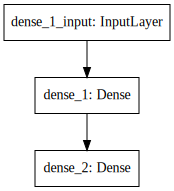

In [15]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(classifier).create(prog='dot', format='svg'))

In [2]:
int((3+1)/2)

2

In [3]:
int(3/2 + 1)

2